# Import Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
from shapely.geometry import shape
import pygwalker as pyg


In [2]:
df = pd.read_csv('living-planet-index.csv', sep = ';') #data comes from https://www.kaggle.com/datasets/elmoallistair/living-planet-index

In [3]:
df.head()

,Region,Year,Average Index,Upper Index,Lower Index
0,Africa,1970,100.000000,100.000000,100.000000
1,Africa,1971,95.461969,104.910803,87.790567
2,Africa,1972,94.683413,110.867839,81.479839
3,Africa,1973,99.181174,120.870721,81.908753
4,Africa,1974,99.384934,127.877780,77.144610


In [4]:
df.shape

(342, 5)

In [5]:
df.groupby('Region').describe()[['Average Index']]

Average Index                         \
                                        count        mean        std   
Region                                                                 
Africa                                   48.0   59.116522  20.819728   
Asia and Pacific                         49.0   76.622352  22.063351   
Europe and Central Asia                  49.0  108.348277  11.167906   
Freshwater                               49.0   47.680265  27.219049   
Latin America and the Caribbean          49.0   37.971016  29.185001   
North America                            49.0   82.195526   8.814125   
World                                    49.0   59.545904  22.209139   

                                                                    \
                                       min         25%         50%   
Region                                                               
Africa                           31.293573   42.313076   53.044350   
Asia and Pacific                 43.996630   61.274500   75.636391   
Europe and Central Asia          82.291534  104.428163  107.576949   
Freshwater                       17.144189   23.917999   41.450490   
Latin America and the Caribbean   6.413632   15.012580   28.683863   
North America                    70.264173   73.567398   84.330566   
World                            30.885270   41.295152   56.200898   

                                                         
                                        75%         max  
Region                                                   
Africa                            76.532881  100.000000  
Asia and Pacific                  96.717307  106.015460  
Europe and Central Asia          113.817977  130.741073  
Freshwater                        69.969215  100.000000  
Latin America and the Caribbean   58.292376  101.007164  
North America                     89.530625  100.000000  
World                             77.281385  100.000000

In [6]:
df = df.rename(columns={'Average Index': 'Average_Index', 'Upper Index': 'Upper_Index', 'Lower Index': 'Lower_Index'})

In [7]:
df_plot = df.loc[df.Region != 'Freshwater']
df_plot = df_plot.loc[df.Region != 'World']

# Country Bar Plot

In [8]:
print(df_plot['Region'].unique())

['Africa' 'Asia and Pacific' 'Europe and Central Asia'
 'Latin America and the Caribbean' 'North America']


In [9]:
df_plot = df_plot.sort_values(by = 'Average_Index')

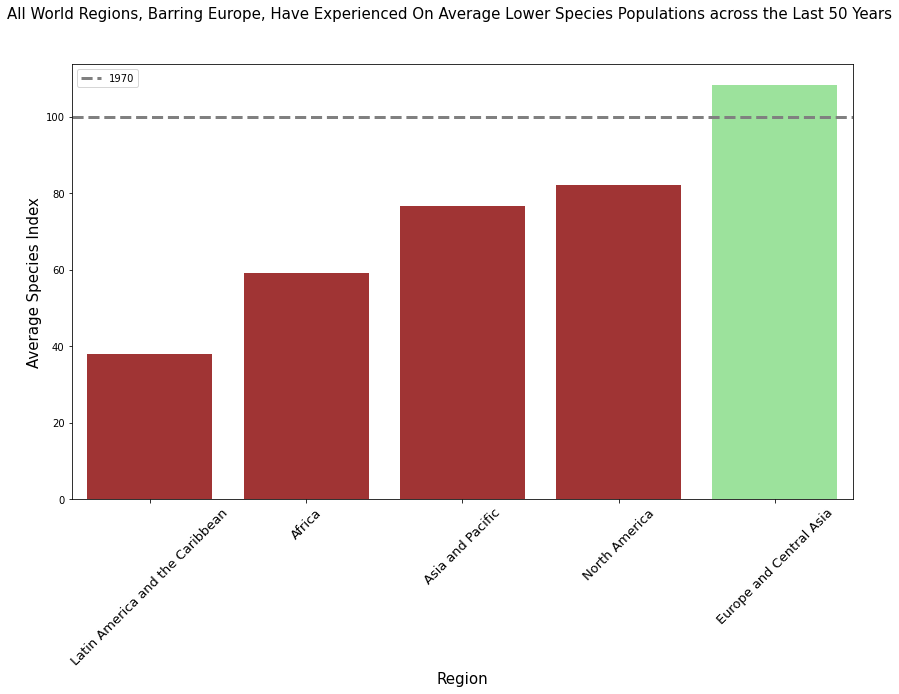

In [10]:
# Create a dictionary to map regions to colors
color_map = {
    'Latin America and the Caribbean': 'firebrick',
    'Africa': 'firebrick',
    'Asia and Pacific': 'firebrick',
    'North America': 'firebrick',
    'Europe and Central Asia': 'lightgreen'
}

# Create a custom color palette based on the color_map
custom_palette = [color_map.get(region, 'gray') for region in df_plot['Region'].unique()]

# Create the bar plot using the custom palette
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=df_plot, x='Region', y='Average_Index', ci=None, palette=custom_palette)

# Customize the plot (add labels, title, etc.)
ax.set_xlabel('Region', size=15)
ax.set_ylabel('Average Species Index', size=15)
ax.tick_params(axis='x', labelsize=13)

plt.xticks(rotation=45)
plt.axhline(y = 100, color = 'grey', linestyle = 'dashed', label = '1970', linewidth = 3)
plt.legend()
plt.suptitle('All World Regions, Barring Europe, Have Experienced On Average Lower Species Populations across the Last 50 Years', size = 15)

# Save the plot with appropriate settings
plt.savefig('Figure1.pdf', bbox_inches='tight', dpi=300)  # Adjust the file format and DPI as needed
plt.show()




# Species Population Change Over Time

In [11]:
df.head()

,Region,Year,Average_Index,Upper_Index,Lower_Index
0,Africa,1970,100.000000,100.000000,100.000000
1,Africa,1971,95.461969,104.910803,87.790567
2,Africa,1972,94.683413,110.867839,81.479839
3,Africa,1973,99.181174,120.870721,81.908753
4,Africa,1974,99.384934,127.877780,77.144610


In [12]:
TS = df.copy()

In [13]:
TS.Year = pd.to_datetime(TS.Year, format = '%Y')

In [14]:
TS

,Region,Year,Average_Index,Upper_Index,Lower_Index
0,Africa,1970-01-01,100.000000,100.000000,100.000000
1,Africa,1971-01-01,95.461969,104.910803,87.790567
2,Africa,1972-01-01,94.683413,110.867839,81.479839
3,Africa,1973-01-01,99.181174,120.870721,81.908753
4,Africa,1974-01-01,99.384934,127.877780,77.144610
...,...,...,...,...,...
337,World,2014-01-01,31.669021,38.071988,26.383458
338,World,2015-01-01,31.627531,38.068720,26.281212
339,World,2016-01-01,31.145408,37.562137,25.770213
340,World,2017-01-01,30.885270,37.343040,25.465452


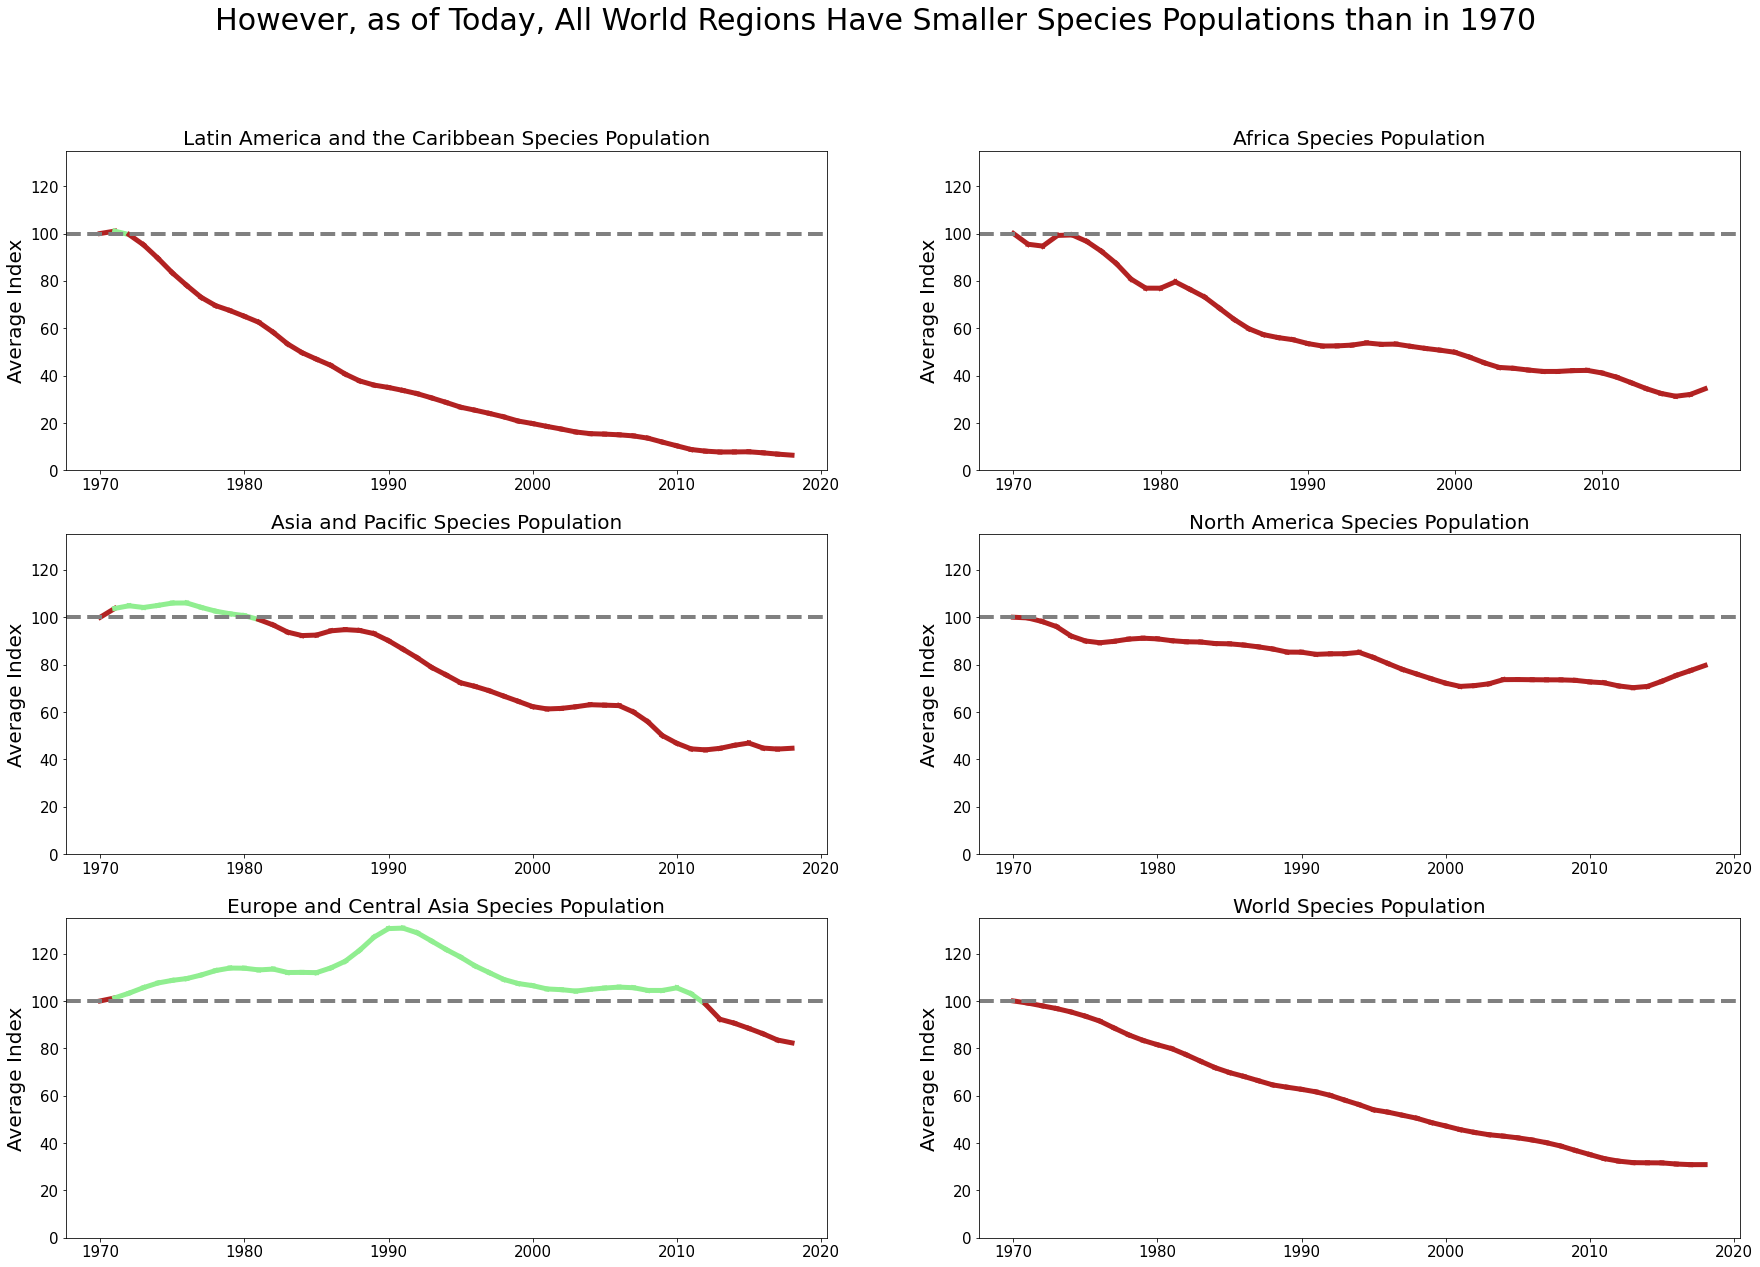

In [15]:

fig, ax = plt.subplots(figsize=(30, 20), ncols=2, nrows=3)

regions = ['Latin America and the Caribbean', 'Africa', 'Asia and Pacific', 'North America', 'Europe and Central Asia', 'World']

for i in range(6):
    row = i // 2
    col = i % 2

    region_data = TS[TS.Region == regions[i]]
    for j in range(len(region_data) - 1):
        color = 'lightgreen' if region_data['Average_Index'].iloc[j] > 100 else 'firebrick'
        ax[row, col].plot(region_data['Year'].iloc[j:j+2], region_data['Average_Index'].iloc[j:j+2], color=color, linewidth=5)
    
    

    ax[row, col].set_ylabel('Average Index', size=20)
    ax[row, col].set_title(f'{regions[i]} Species Population', size=20)
    ax[row, col].set_ylim(0, 135)
    ax[row, col].axhline(y=100, color='grey', linestyle='dashed', linewidth=4)
    ax[row, col].tick_params(axis='x', labelsize=15)
    ax[row, col].tick_params(axis='y', labelsize=15)

plt.suptitle("However, as of Today, All World Regions Have Smaller Species Populations than in 1970", size=30)

# Save the plot with appropriate settings
plt.savefig('Figure2.pdf', bbox_inches='tight', dpi=300)  # Adjust the file format and DPI as needed

plt.show()



# Time Series Forecast

In [16]:
TS = TS[TS.Region == 'World'].set_index('Year')

In [17]:
#bring in global CO2 levels

co2 = pd.read_csv('2100-projections_climate-scoreboard_2015-1214.csv') # data is sourced from here https://www.co2.earth/23-co2-future

In [18]:
co2.tail()

,Year,CO2_emission,Global CO2 Equivalent Emissions\n(GtonsCO2/year),Global CO2 Equivalent Emissions\n(GtonsCO2/year).1,Global CO2 Equivalent Emissions\n(GtonsCO2/year).2,Global CO2 Equivalent Emissions\n(GtonsCO2/year).3,Global CO2 Equivalent Emissions\n(GtonsCO2/year).4,Global CO2 Equivalent Emissions\n(GtonsCO2/year).5,Global CO2 Equivalent Emissions\n(GtonsCO2/year).6
196,2096,138.624,80.9863,67.5537,52.4193,33.4344,6.91386,3.45631,1.120440
197,2097,138.803,81.0791,67.5724,52.3261,33.1017,6.67606,3.31673,1.065390
198,2098,138.983,81.1672,67.5875,52.2318,32.7686,6.44644,3.18283,1.013070
199,2099,139.162,81.2505,67.5990,52.1360,32.4351,6.22471,3.05436,0.963331
200,2100,139.342,81.3288,67.6067,52.0385,32.1011,6.01062,2.93112,0.916054


In [19]:
co2['Year'] = pd.to_datetime(co2['Year'], format = '%Y')

In [20]:
co2.set_index('Year', inplace = True)

In [21]:
future_exog = co2[co2.index > '2017-01-01']

In [22]:
future_exog = future_exog[future_exog.index < '2035-01-01']

In [23]:
TS = pd.merge(TS, co2, how = "left", on = 'Year' )

In [24]:
TS

,Region,Average_Index,Upper_Index,Lower_Index,CO2_emission,Global CO2 Equivalent Emissions\n(GtonsCO2/year),Global CO2 Equivalent Emissions\n(GtonsCO2/year).1,Global CO2 Equivalent Emissions\n(GtonsCO2/year).2,Global CO2 Equivalent Emissions\n(GtonsCO2/year).3,Global CO2 Equivalent Emissions\n(GtonsCO2/year).4,Global CO2 Equivalent Emissions\n(GtonsCO2/year).5,Global CO2 Equivalent Emissions\n(GtonsCO2/year).6
Year,,,,,,,,,,,,
1970-01-01,World,100.000000,100.000000,100.000000,29.2509,29.2509,29.2509,29.2509,29.2509,29.2509,29.2509,29.2509
1971-01-01,World,99.100276,100.953212,97.314895,28.9959,28.9959,28.9959,28.9959,28.9959,28.9959,28.9959,28.9959
1972-01-01,World,97.929884,101.193083,94.765395,30.0417,30.0417,30.0417,30.0417,30.0417,30.0417,30.0417,30.0417
1973-01-01,World,96.782841,101.005601,92.663605,30.9854,30.9854,30.9854,30.9854,30.9854,30.9854,30.9854,30.9854
1974-01-01,World,95.345434,100.618550,90.268275,30.8474,30.8474,30.8474,30.8474,30.8474,30.8474,30.8474,30.8474
1975-01-01,World,93.555801,99.797105,87.630311,31.0271,31.0271,31.0271,31.0271,31.0271,31.0271,31.0271,31.0271
1976-01-01,World,91.489219,98.407939,84.933780,32.4536,32.4536,32.4536,32.4536,32.4536,32.4536,32.4536,32.4536
1977-01-01,World,88.535241,95.610893,81.853089,33.3080,33.3080,33.3080,33.3080,33.3080,33.3080,33.3080,33.3080
1978-01-01,World,85.684047,92.787161,78.986261,34.0199,34.0199,34.0199,34.0199,34.0199,34.0199,34.0199,34.0199


## Test train split

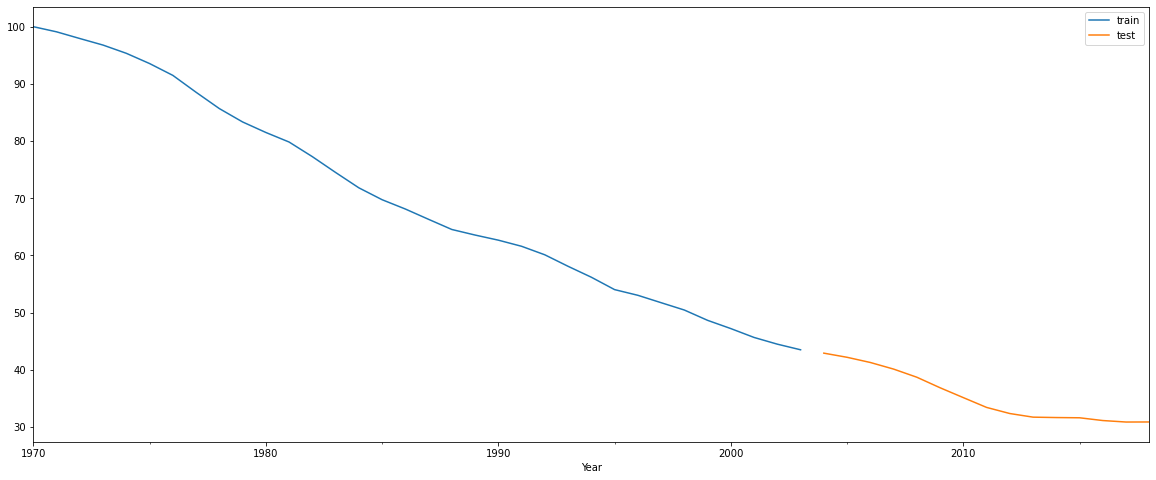

In [25]:


total_points = len(TS)
train_size = int(0.7 * total_points) #this means 70% of our data points get used to train our data set

train = TS.iloc[0:train_size]
test = TS.iloc[train_size:]

fig, ax = plt.subplots(figsize=(20, 8))
train['Average_Index'].plot(ax=ax, label='train')
test['Average_Index'].plot(ax=ax, label='test')
plt.legend()
plt.show()


#### Look at autocorrelation

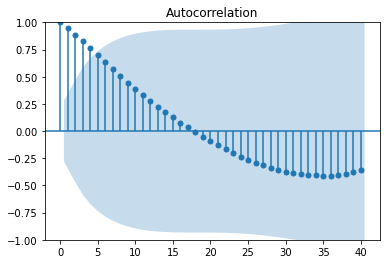

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(TS['Average_Index'], lags=40) 
plt.show()

#strong non constant autocorrelation but no sign of seasonality 

<Figure size 432x288 with 0 Axes>

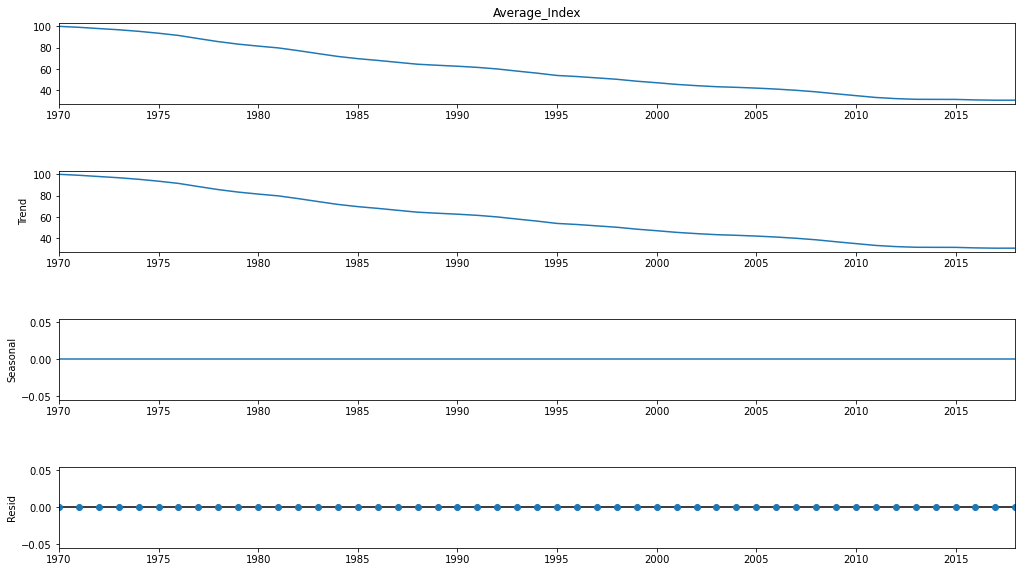

In [27]:
#seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(TS['Average_Index'], period = 1) #no seasonality

fig = plt.figure()  
fig = decompose.plot() 
fig.set_size_inches((16, 9))

In [28]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(TS['Average_Index'], regression = 'ct') #Tests for stationarity assuming a constant mean and a linear trend.
print('p-value: ' +str(result[1]))

#null hypothesis = data is not stationary
#alternative = data is stationary

#fail to reject null, data is not stationary

p-value: 0.9687451690523868


## Model 1 = Holts Linear Forecast

C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


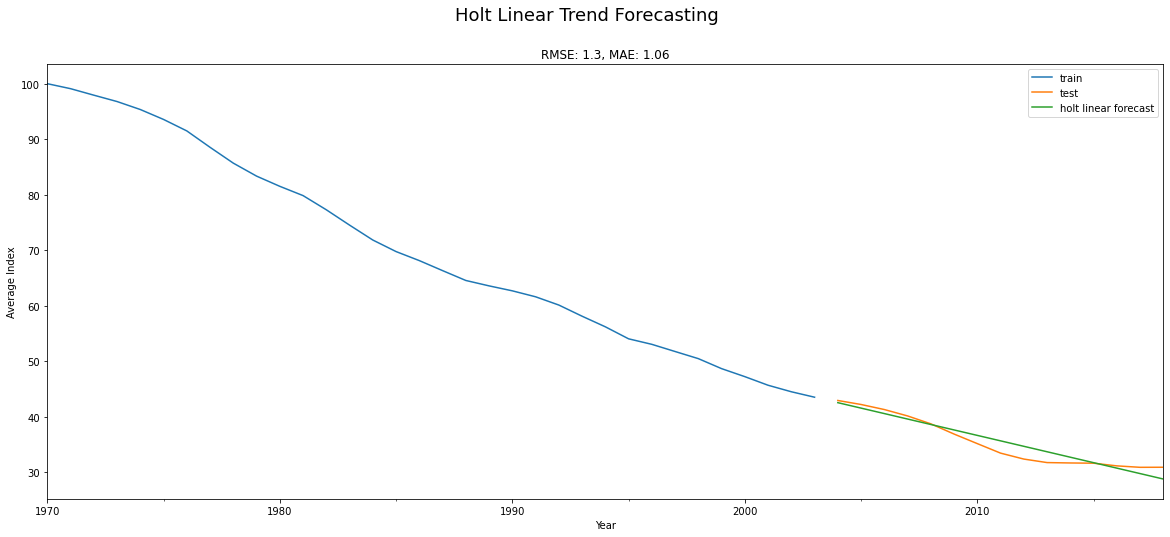

In [29]:
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# create Holt model
# If your data is showing an exponential trend (not linear), set exponential=True
holt = Holt(train['Average_Index'],exponential=False).fit(optimized = True) 



test_holt=test.copy() # create test set for this example
test_holt['predicted']=holt.forecast(len(test_holt)) # for each observation in test set, assign holt forecast

# calculate errors and round to 2 d.p
rmse_holt=round(np.sqrt(mean_squared_error(test_holt['Average_Index'],test_holt.predicted)),2)
mae_holt=round(mean_absolute_error(test_holt['Average_Index'],test_holt.predicted),2)

fig, ax = plt.subplots(figsize=(20,8))
train['Average_Index'].plot(ax=ax,label='train')
test_holt['Average_Index'].plot(ax=ax,label='test')
test_holt.predicted.plot(ax=ax,label='holt linear forecast')
plt.legend()
plt.title('RMSE: '+str(rmse_holt)+', MAE: '+str(mae_holt))
plt.suptitle('Holt Linear Trend Forecasting',fontsize=18)
plt.ylabel('Average Index')
plt.show()

# Sometimes you might get a convergence warning, this is not an error, but an indication the model struggled to get going.


In [30]:
holt = Holt(TS['Average_Index'],exponential=False).fit(optimized = True) 
forward_forecast=holt.predict(start=TS.index[-1],end='2035-01-01')# the start date is the last observation in the data, you choose the end date
print(forward_forecast)

2018-01-01    30.625132
2019-01-01    30.909864
2020-01-01    30.922161
2021-01-01    30.934459
2022-01-01    30.946756
2023-01-01    30.959053
2024-01-01    30.971350
2025-01-01    30.983647
2026-01-01    30.995944
2027-01-01    31.008241
2028-01-01    31.020538
2029-01-01    31.032835
2030-01-01    31.045132
2031-01-01    31.057430
2032-01-01    31.069727
2033-01-01    31.082024
2034-01-01    31.094321
2035-01-01    31.106618
Freq: AS-JAN, dtype: float64


C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Text(0.5, 0, 'Year')

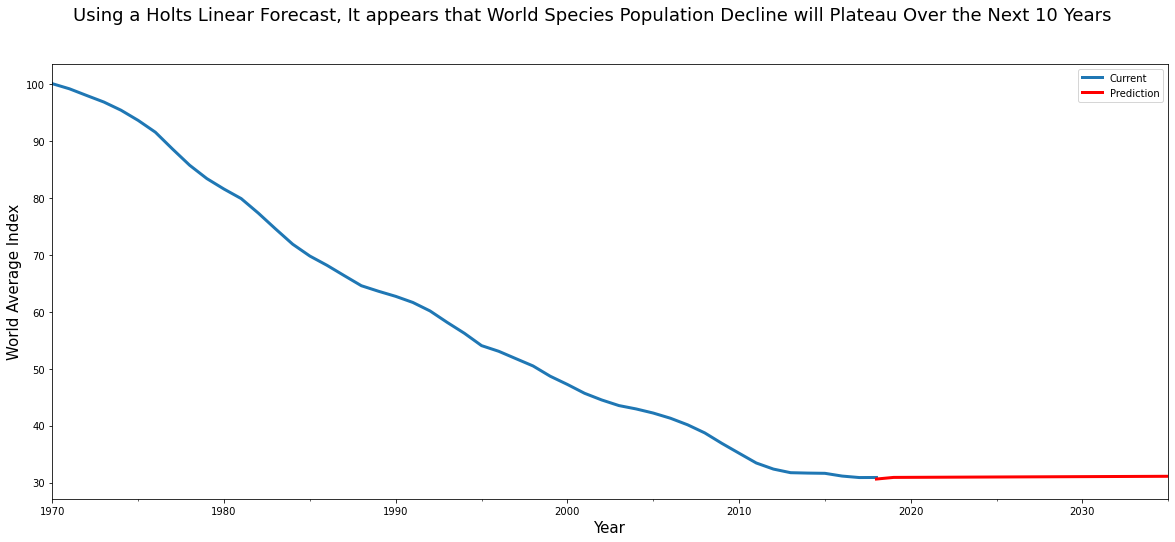

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
TS['Average_Index'].plot(ax=ax,label='Current', linewidth = 3)
forward_forecast.plot(ax= ax, label = 'Prediction', color = 'red', linewidth = 3)

plt.legend()
plt.suptitle("Using a Holts Linear Forecast, It appears that World Species Population Decline will Plateau Over the Next 10 Years",fontsize=18)
plt.ylabel('World Average Index', size = 15)
plt.xlabel('Year', size = 15)




## Model 2 - ARIMAX

### Integrative part of model - D

p-value:0.44171130108322176


C:\Users\Chris Butler\AppData\Local\Temp\ipykernel_26072\3920404441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['difference'] = train['Average_Index'].diff(periods = 1)


<AxesSubplot:xlabel='Year'>

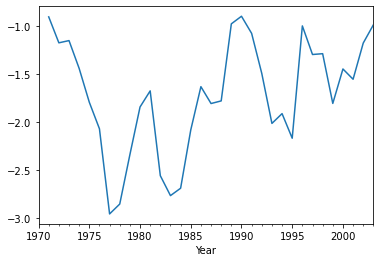

In [32]:
#How many times do I need to difference data to make it stationary?

train['difference'] = train['Average_Index'].diff(periods = 1)
train.head()
result_diff = adfuller(train.difference.dropna())
print('p-value:' +str(result_diff[1]))

fig, ax = plt.subplots()
train['difference'].plot()

#Once is still not stationary

p-value:6.67699954524058e-05


C:\Users\Chris Butler\AppData\Local\Temp\ipykernel_26072\848809148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['difference_2'] = train['difference'].diff(periods = 1)


<AxesSubplot:xlabel='Year'>

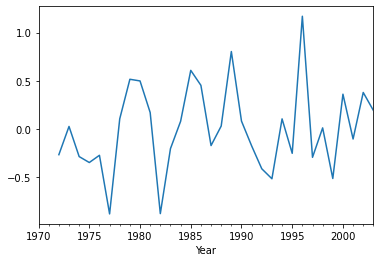

In [33]:
#How many times do I need to difference data to make it stationary?

train['difference_2'] = train['difference'].diff(periods = 1)
train.head()
result_diff_2 = adfuller(train.difference_2.dropna())
print('p-value:' +str(result_diff_2[1]))

fig, ax = plt.subplots()
train['difference_2'].plot()

#twice and data is stationary

In [34]:
# D = 2

#### The order of autoregression - P

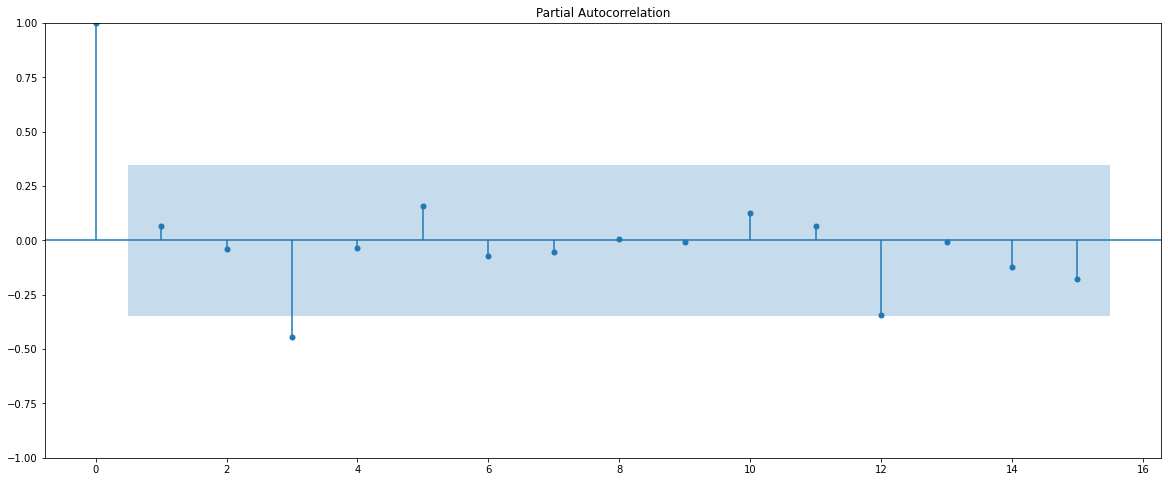

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots( figsize=(20,8))

plot_pacf(train.difference_2.dropna(),lags=15,ax=ax,method='ywm') 
plt.show()

In [36]:
# P = 0

#### Moving Averages- q

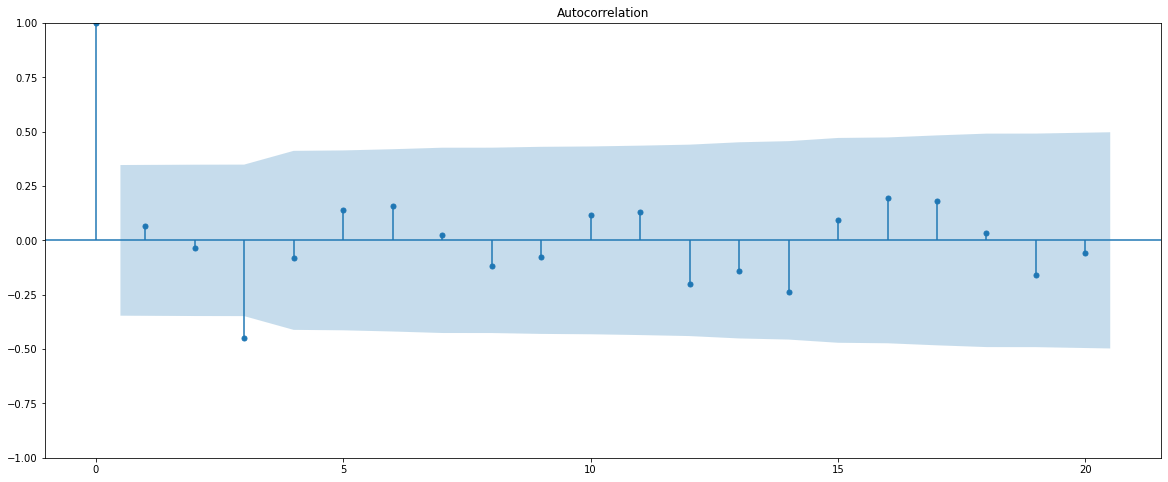

In [37]:

fig, ax = plt.subplots( figsize=(20,8))

plot_acf(train.difference_2.dropna(),lags=20,ax=ax) 
plt.show()

In [38]:
#Q = 0

C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


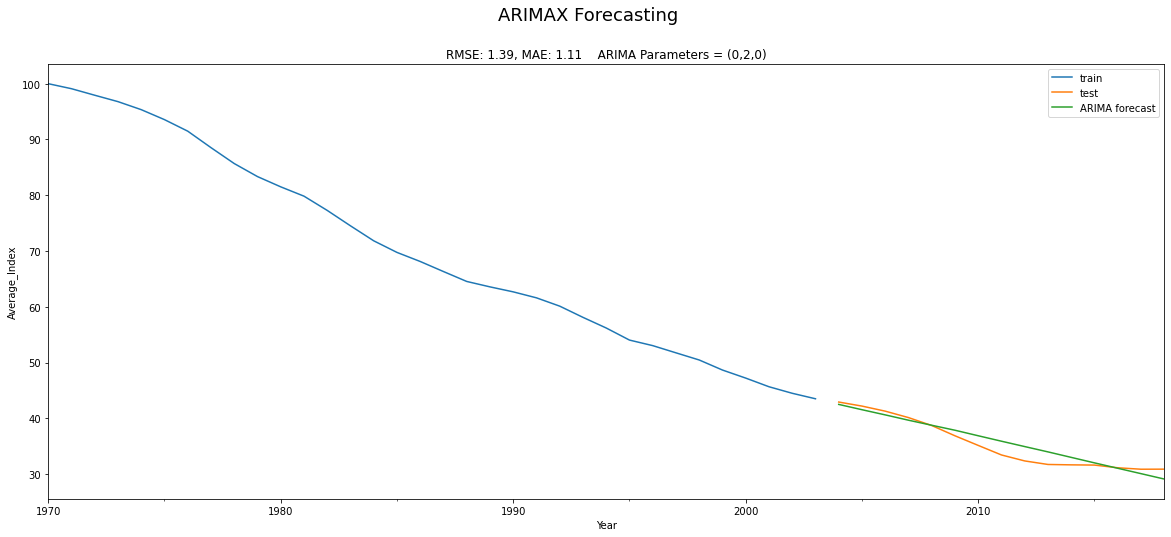

In [39]:
from statsmodels.tsa.arima.model import ARIMA
# create ARIMAX model with best order
arima = ARIMA(train['Average_Index'],order=(0,2,0), exog = train['CO2_emission']).fit() # exogenous variable is mean annual Co2

test_arima=test.copy() # create test set for this example

# To use this function for prediction you need to provide the first and last date
test_arima['predicted']=arima.predict(start=test_arima.index[0],end=test_arima.index[-1], exog = test['CO2_emission']) 

# calculate errors and round to 2 d.p
rmse_arima=round(np.sqrt(mean_squared_error(test_arima['Average_Index'],test_arima.predicted)),2)
mae_arima=round(mean_absolute_error(test_arima['Average_Index'],test_arima.predicted),2)


fig, ax = plt.subplots(figsize=(20,8))
train['Average_Index'].plot(ax=ax,label='train')
test_arima['Average_Index'].plot(ax=ax,label='test')
test_arima.predicted.plot(ax=ax,label='ARIMA forecast')
plt.legend()
plt.title('RMSE: '+str(rmse_arima)+', MAE: '+str(mae_arima)+ '    ARIMA Parameters = (0,2,0)')
plt.suptitle("ARIMAX Forecasting",fontsize=18)
plt.ylabel('Average_Index')
plt.show()

#### forward facing prediction

In [40]:
TS.head()

,Region,Average_Index,Upper_Index,Lower_Index,CO2_emission,Global CO2 Equivalent Emissions\n(GtonsCO2/year),Global CO2 Equivalent Emissions\n(GtonsCO2/year).1,Global CO2 Equivalent Emissions\n(GtonsCO2/year).2,Global CO2 Equivalent Emissions\n(GtonsCO2/year).3,Global CO2 Equivalent Emissions\n(GtonsCO2/year).4,Global CO2 Equivalent Emissions\n(GtonsCO2/year).5,Global CO2 Equivalent Emissions\n(GtonsCO2/year).6
Year,,,,,,,,,,,,
1970-01-01,World,100.000000,100.000000,100.000000,29.2509,29.2509,29.2509,29.2509,29.2509,29.2509,29.2509,29.2509
1971-01-01,World,99.100276,100.953212,97.314895,28.9959,28.9959,28.9959,28.9959,28.9959,28.9959,28.9959,28.9959
1972-01-01,World,97.929884,101.193083,94.765395,30.0417,30.0417,30.0417,30.0417,30.0417,30.0417,30.0417,30.0417
1973-01-01,World,96.782841,101.005601,92.663605,30.9854,30.9854,30.9854,30.9854,30.9854,30.9854,30.9854,30.9854
1974-01-01,World,95.345434,100.618550,90.268275,30.8474,30.8474,30.8474,30.8474,30.8474,30.8474,30.8474,30.8474


In [41]:
arimax= ARIMA(TS['Average_Index'],order=(0,2,0), exog = TS['CO2_emission']).fit()
future_forecast=arimax.predict(start='2017-01-01',end='2035-01-01', exog = future_exog['CO2_emission'])

C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Chris Butler\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


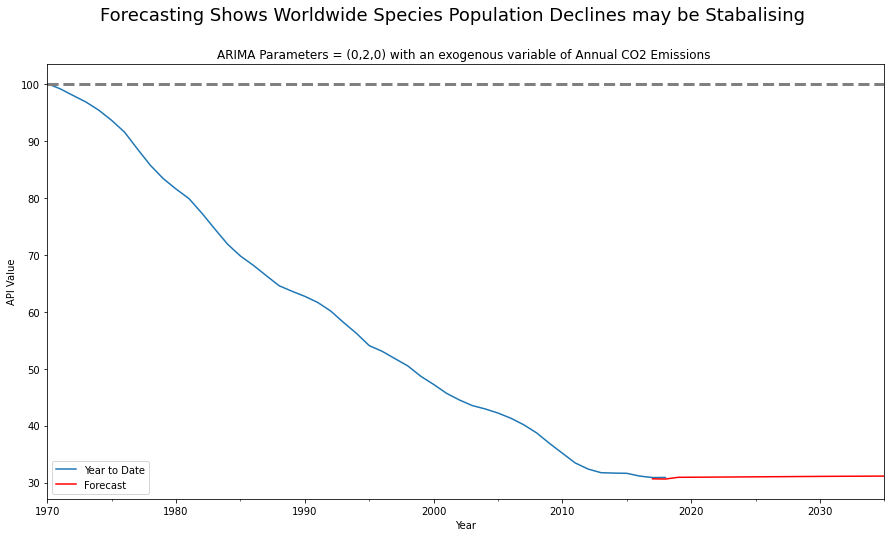

In [52]:
# plot the forecast

fig, ax = plt.subplots(figsize=(15,8))
TS['Average_Index'].plot(ax=ax,label='Year to Date')
future_forecast.plot(ax= ax, label = 'Forecast', color = 'red')

plt.legend()
plt.suptitle('Forecasting Shows Worldwide Species Population Declines may be Stabalising',fontsize=18)
plt.title('ARIMA Parameters = (0,2,0) with an exogenous variable of Annual CO2 Emissions ')
plt.ylabel('API Value')
plt.axhline(y = 100, color = 'grey', linestyle = 'dashed', linewidth = 3)
# Save the plot with appropriate settings
plt.savefig('Figure3.pdf', bbox_inches='tight', dpi=300)  # Adjust the file format and DPI as needed
plt.show()


In [43]:
future_forecast

2017-01-01    30.663286
2018-01-01    30.625132
2019-01-01    30.928089
2020-01-01    30.940385
2021-01-01    30.952682
2022-01-01    30.967586
2023-01-01    30.982491
2024-01-01    30.997395
2025-01-01    31.012300
2026-01-01    31.027205
2027-01-01    31.042110
2028-01-01    31.057016
2029-01-01    31.071919
2030-01-01    31.086825
2031-01-01    31.101731
2032-01-01    31.111136
2033-01-01    31.120542
2034-01-01    31.129948
2035-01-01    31.139354
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [44]:
print(arimax.summary())

                               SARIMAX Results                                
Dep. Variable:          Average_Index   No. Observations:                   49
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -25.514
Date:                Sun, 29 Oct 2023   AIC                             55.029
Time:                        12:30:25   BIC                             58.729
Sample:                    01-01-1970   HQIC                            56.421
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CO2_emission    -0.0154      0.077     -0.201      0.841      -0.166       0.135
sigma2           0.1734      0.034      5.054      0.000       0.106       0.241
Ljung-Box (L1) (Q):                   0.98  